In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms import  transforms, Compose, Normalize
from torchvision import datasets 
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/nouhou/Nouhou_repertoire/rhc_dataset-main') 

from Data_Augmentation import DataAugmentationMNIST, Convertisseur 
from multi_label_vae_module import *
from multi_targets_mlp import  EvaluationLatenteY, EvaluationFromX

In [4]:
#next(iter(train_loader))

In [4]:
#chargement et transformation de données
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

#Vos transformations de données
data_train = DataAugmentationMNIST(train_dataset, 4, 4).images_melangees()
data_test = DataAugmentationMNIST(test_dataset, 4, 4).images_melangees()

#Aplatir les x et redimensionner les y 
#y_10_train_tensor: cible à 10 categories (0 à 9) 
#y_4_test_tensor: cible à 4 categories (0 à 3)
#y_2_train_tensor: cible à binaire (0 ou 1)

convertisseur = Convertisseur(data_train,1024)
x_train_tensor, y_reshape= convertisseur.diviseur_reshape()
y_10_train_tensor, y_4_train_tensor, y_2_train_tensor= y_reshape

convertisseur = Convertisseur(data_test,1024)
x_test_tensor,y_reshape = convertisseur.diviseur_reshape()
y_10_test_tensor, y_4_test_tensor, y_2_test_tensor = y_reshape


#Preparation de donnée 
data_train = TensorDataset(x_train_tensor, y_10_train_tensor,y_4_train_tensor, y_2_train_tensor)
data_test = TensorDataset(x_test_tensor, y_10_test_tensor,y_4_test_tensor, y_2_test_tensor)

batch_size = 128

train_loader = DataLoader(data_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(data_test, batch_size=batch_size)


Epoch 1, Loss: 595.8885745442708
Epoch 2, Loss: 559.9956998697917
Epoch 3, Loss: 553.5017608723958
Epoch 4, Loss: 550.5808745442708
Epoch 5, Loss: 548.6675623046875
Epoch 6, Loss: 546.8893860026042
Epoch 7, Loss: 545.5752978515625
Epoch 8, Loss: 544.35846953125
Epoch 9, Loss: 543.4228986328125
Epoch 10, Loss: 542.5453166015625
Epoch 11, Loss: 541.8233612630208
Epoch 12, Loss: 541.064015234375
Epoch 13, Loss: 540.4672998697916
Epoch 14, Loss: 539.9097934244792
Epoch 15, Loss: 539.4474238932291
Epoch 16, Loss: 538.9964884765625
Epoch 17, Loss: 538.6577972005208
Epoch 18, Loss: 538.2876583984375
Epoch 19, Loss: 537.9536196614583
Epoch 20, Loss: 537.6617626302084
Epoch 21, Loss: 537.4026658854167
Epoch 22, Loss: 537.107350390625
Epoch 23, Loss: 536.919626953125
Epoch 24, Loss: 536.6892998046875
Epoch 25, Loss: 536.4712080078125
Epoch 26, Loss: 536.3585215494792
Epoch 27, Loss: 536.1339709635416
Epoch 28, Loss: 535.956396484375
Epoch 29, Loss: 535.7240365885417
Epoch 30, Loss: 535.622637890

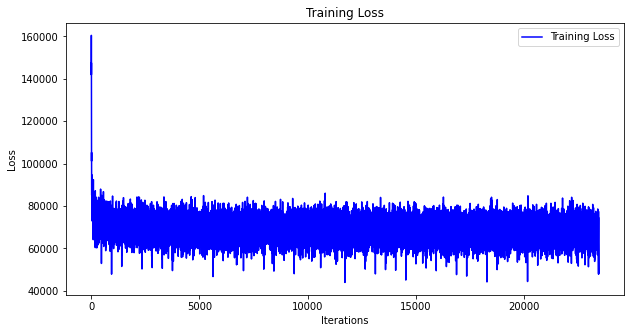

In [83]:
input_dim = 1024
hidden_dim = 300
latent_dim = 10
num_labels1 = 10
num_labels2 = 4
num_labels3 = 1
output =2
use_labels_in_input=False
epoch = 50
beta = 1



model = ModularVAE(input_dim, hidden_dim, latent_dim, num_labels1, num_labels2,num_labels3,use_labels_in_input)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

model.train_modular_vae(train_loader, optimizer, epoch, beta)

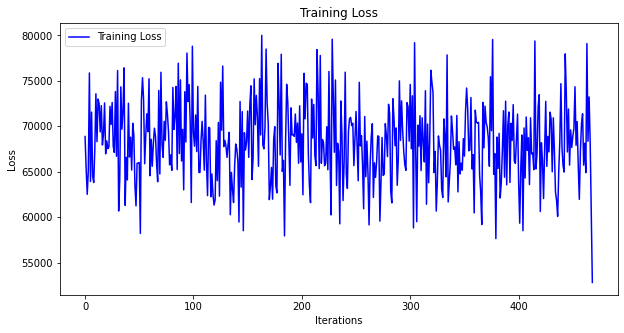

Evaluation Loss: 533.4520938151041


533.4520938151041

In [85]:
model. evaluate_modular_vae(train_loader, beta)

Epoch [1/20], Loss: 4.385593379738489
Epoch [2/20], Loss: 4.385046954856499
Epoch [3/20], Loss: 4.384028259879236
Epoch [4/20], Loss: 4.3840293070909055
Epoch [5/20], Loss: 4.383230628235253
Epoch [6/20], Loss: 4.383163234572421
Epoch [7/20], Loss: 4.382883942203481
Epoch [8/20], Loss: 4.382632224036178
Epoch [9/20], Loss: 4.382112951421026
Epoch [10/20], Loss: 4.382046695457085
Epoch [11/20], Loss: 4.3815598142172485
Epoch [12/20], Loss: 4.381650285171801
Epoch [13/20], Loss: 4.381739815669273
Epoch [14/20], Loss: 4.381356659220226
Epoch [15/20], Loss: 4.381465190000879
Epoch [16/20], Loss: 4.38119340908807
Epoch [17/20], Loss: 4.3812975761478645
Epoch [18/20], Loss: 4.3811144117099134
Epoch [19/20], Loss: 4.381062422225725
Epoch [20/20], Loss: 4.381034413888765


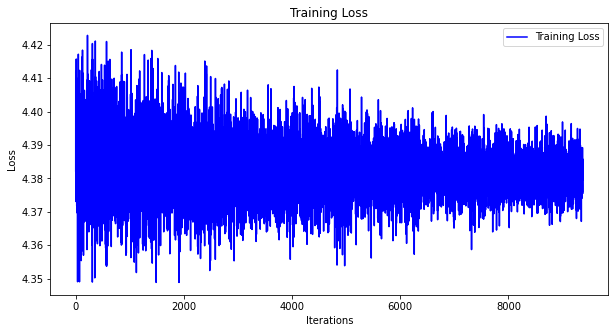

In [43]:
##### Evaluation à partir de l'espace latent 
model = EvaluationLatenteY(input_dim, latent_dim, hidden_dim, num_labels1, num_labels2, num_labels3, output, use_labels_in_input)  
epoch = 20
optimizer = optim.Adam(model.parameters(), lr=1e-3)
model.train_module(train_loader, optimizer, epoch)


In [54]:

# Evaluation à partir de l'espace latent 

model.evaluation(test_loader)

Metriques pour y1:
+-----------+----------------------+
| Metriques |       Valeurs        |
+-----------+----------------------+
| Accuracy  |        0.116         |
| Precision | 0.013516481314497545 |
|  Recall   |        0.116         |
| F1 Score  | 0.024211773151471643 |
+-----------+----------------------+

Matrice de confusion pour y1:
+---+------+---+---+---+---+---+---+---+---+
| 0 | 942  | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 |
| 0 | 1160 | 0 | 0 | 0 | 0 | 0 | 3 | 0 | 0 |
| 0 | 1009 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 |
| 0 | 986  | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 |
| 0 | 979  | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 |
| 0 | 890  | 0 | 0 | 0 | 0 | 0 | 2 | 0 | 0 |
| 0 | 968  | 0 | 0 | 0 | 0 | 0 | 4 | 0 | 0 |
| 0 | 1053 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 961  | 0 | 0 | 0 | 0 | 0 | 2 | 0 | 0 |
| 0 | 1033 | 0 | 0 | 0 | 0 | 0 | 4 | 0 | 0 |
+---+------+---+---+---+---+---+---+---+---+

Rapport de classification pour y1:
              precision    recall  f1-score   support

         0.0       0.00

Epoch [1/20], Loss: 3.0675183277902827
Epoch [2/20], Loss: 2.814513853109722
Epoch [3/20], Loss: 2.776316765274829
Epoch [4/20], Loss: 2.760654663480421
Epoch [5/20], Loss: 2.7184840453459
Epoch [6/20], Loss: 2.707016852364611
Epoch [7/20], Loss: 2.700799677163553
Epoch [8/20], Loss: 2.695890444936529
Epoch [9/20], Loss: 2.69398031509253
Epoch [10/20], Loss: 2.6920851685090867
Epoch [11/20], Loss: 2.69125374700469
Epoch [12/20], Loss: 2.688530530502547
Epoch [13/20], Loss: 2.6804239571984136
Epoch [14/20], Loss: 2.645302229090286
Epoch [15/20], Loss: 2.6423380512164347
Epoch [16/20], Loss: 2.642369976938406
Epoch [17/20], Loss: 2.6414275698061944
Epoch [18/20], Loss: 2.6397354130043404
Epoch [19/20], Loss: 2.6363378099795343
Epoch [20/20], Loss: 2.6085475848427713


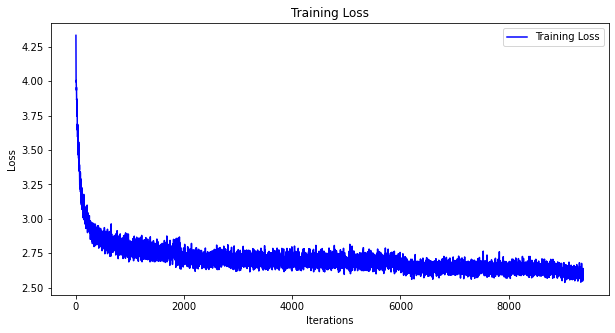

In [73]:
## Prediction des  differentes labels  à partir de x 

model = EvaluationFromX(input_dim, hidden_dim, num_labels1,num_labels2,  output)

optimizer = optim.Adam(model.parameters(), lr=1e-3)

model.train_evaluation(train_loader, optimizer, epoch)

In [74]:
# Evaluation  à partir de x 


model.evaluation(test_loader)

Metriques pour y1:
+-----------+--------------------+
| Metriques |      Valeurs       |
+-----------+--------------------+
| Accuracy  |       0.898        |
| Precision | 0.8945345951842177 |
|  Recall   |       0.898        |
| F1 Score  | 0.8933410825275158 |
+-----------+--------------------+

Matrice de confusion pour y1:
+-----+------+-----+-----+-----+-----+-----+------+-----+-----+
| 932 |  0   |  1  |  1  |  0  |  0  |  7  |  1   |  1  |  0  |
|  0  | 1152 |  4  |  1  |  2  |  1  |  1  |  0   |  2  |  0  |
| 10  |  0   | 974 |  9  |  0  |  3  |  2  |  5   |  7  |  0  |
|  4  |  0   |  7  | 936 |  0  | 28  |  0  |  5   |  5  |  2  |
|  1  |  3   |  8  |  1  | 921 |  1  | 13  |  2   |  8  | 22  |
| 15  |  5   |  7  | 207 |  3  | 418 | 30  |  13  | 178 | 16  |
|  8  |  4   |  8  |  0  |  7  |  3  | 938 |  0   |  4  |  0  |
|  0  |  7   | 21  |  4  |  2  |  2  |  0  | 1006 |  1  | 10  |
|  7  |  2   |  7  | 11  |  8  | 128 |  7  |  8   | 783 |  2  |
|  6  |  8   |  2  | 11  | 37 

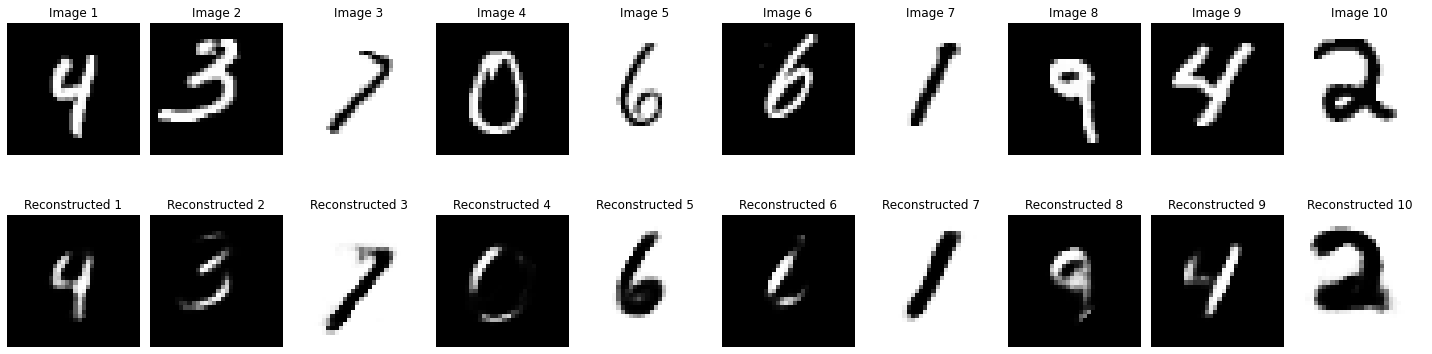

In [87]:
model.eval()
fig, axes = plt.subplots(2, 10, figsize=(20, 6))

with torch.no_grad():
    for i, (x, y1, y2, y3) in enumerate(test_loader):
        if i == 10:
            break
        recon_x, _, _ = model(x, y1, y2, y3)  # Corrected line
        
        # Display the original image
        axes[0, i].imshow(x[0].view(32, 32).cpu().numpy(), cmap='gray')
        axes[0, i].set_title(f'Image {i+1}')
        axes[0, i].axis('off')
        
        # Display the reconstructed image
        axes[1, i].imshow(recon_x[0].view(32, 32).cpu().numpy(), cmap='gray')
        axes[1, i].set_title(f'Reconstructed {i+1}')
        axes[1, i].axis('off')

plt.tight_layout()
plt.show()


In [88]:

original_label1 = 1
original_label3 = 1
target_label1 = 5
target_label3 = 0

# Convertir les labels en tenseurs et les envoyer au bon périphérique
original_label1_tensor = torch.tensor([original_label1])
original_label3_tensor = torch.tensor([original_label3])
target_label1_tensor = torch.tensor([target_label1])
target_label3_tensor = torch.tensor([target_label3])

# Obtenir la dimension latente
latent_dim = model.fc2_mean.out_features

# Échantillonner un vecteur latent
latent_sample = torch.randn(1, latent_dim)

# Encoder les labels en one-hot unsqueeze(0)
original_label1_onehot = F.one_hot(original_label1_tensor, num_classes=10).float()
target_label1_onehot = F.one_hot(target_label1_tensor, num_classes=10).float()

# Combiner le vecteur latent avec les labels pour l'entrée du décodeur
combined_input_original = torch.cat((latent_sample, original_label1_onehot, original_label3_tensor.unsqueeze(0).float()), dim=1)
combined_input_target = torch.cat((latent_sample, target_label1_onehot, target_label3_tensor.unsqueeze(0).float()), dim=1)

# Reconstruire les images à partir de l'espace latent
model.eval()
with torch.no_grad():
    reconstructed_image_original = model.decode(combined_input_original).view(32, 32).cpu().numpy()
    reconstructed_image_target = model.decode(combined_input_target).view(32, 32).cpu().numpy()

# Calculer la différence de pixels
pixel_difference = reconstructed_image_target - reconstructed_image_original

# Afficher les images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.imshow(reconstructed_image_original, cmap='gray')
ax1.axis('off')
ax1.set_title(f"Original Number {original_label1}")
ax2.imshow(reconstructed_image_target, cmap='gray')
ax2.axis('off')
ax2.set_title(f"Reconstructed Number with Label {target_label1}")
plt.show()


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x21 and 25x300)